In [2]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [24]:
data = pd.read_csv('repo/7506_ml/data/fiuba-trocafone-tp2-final-set/events_up_to_01062018.csv')

/home/july/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (3,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# Events

Aplico one hot enconding sobre "event" para estudiar la correlacion entre la cantidad de eventos por usuario y el conversion

In [52]:
data.head(3)

,timestamp,event,person,url,sku,model,condition,storage,color,skus,...,search_engine,channel,new_vs_returning,city,region,country,device_type,screen_resolution,operating_system_version,browser_version
0,2018-05-18 00:11:59,viewed product,4886f805,NaN,9288.0,Samsung Galaxy J7 Prime,Excelente,32GB,Dourado,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-05-18 00:11:27,viewed product,ad93850f,NaN,304.0,iPhone 5s,Muito Bom,32GB,Cinza espacial,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-05-18 00:11:16,viewed product,0297fc1e,NaN,6888.0,iPhone 6S,Muito Bom,64GB,Prateado,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [71]:
data.event.value_counts().reset_index().T

,0,1,2,3,4,5,6,7,8,9,10
index,viewed product,brand listing,visited site,ad campaign hit,generic listing,searched products,search engine hit,checkout,staticpage,conversion,lead
event,1248124,216312,204069,191388,160176,130616,106406,65315,11201,7091,983


In [73]:
columns = ['viewed product','brand listing','visited site','ad campaign hit','generic listing','searched products','search engine hit','checkout','staticpage','conversion','lead']

In [59]:
label = pd.read_csv('repo/7506_ml/data/fiuba-trocafone-tp2-final-set/labels_training_set.csv')

In [63]:
df2 = pd.merge(data[['person','event']], label, on = 'person', how = 'right')

In [113]:
def complete_new_df(new_df, row):
    new_df[row[0]] = row[1]
    

In [123]:
def cantidad(df):
    cant_event = df.event.value_counts().reset_index()
    new_df = pd.DataFrame()
    for event in eventos_posibles:
        new_df[event] = [0]
    new_df['person'] = df['person'].unique()[0]
    cant_event.apply(lambda x: complete_new_df(new_df, x), axis=1)
    return new_df
    

In [126]:
canti = df2.groupby('person').apply(lambda x : cantidad(x))

In [65]:
import pickle as pkl

In [189]:
filename = 'cantidad_eventos_por_persona.pkl'
with open(filename, 'wb') as file:
    pkl.dump(cantidad,file)

In [3]:
filename = 'cantidad_eventos_por_persona.pkl'
with open(filename, 'rb') as file:
    cantidad = pkl.load(file)

In [188]:
cantidad

,viewed product,searched products,ad campaign hit,staticpage,checkout,search engine hit,conversion,generic listing,brand listing,visited site,lead,person,label
0,0,0,0,0,3,0,0,1,0,2,0,0008ed71,0
1,3,9,1,0,1,1,0,1,0,1,0,000c79fe,0
2,4,4,5,0,1,0,0,4,0,1,0,001802e4,0
3,189,11,29,0,15,13,2,28,165,19,0,0019e639,0
4,2,0,0,0,2,0,1,1,1,0,0,001b0bf9,0
5,52,0,7,0,1,6,0,8,7,15,0,001ca5ee,0
6,18,0,5,0,0,6,0,2,0,4,0,001dfc31,0
7,17,0,13,0,3,10,0,0,4,7,0,001e9aea,0
8,2,0,2,0,2,0,1,0,0,2,0,0020152e,0
9,12,0,2,0,1,1,0,3,17,2,0,002b0188,0


In [6]:
cantidad = pd.merge(cantidad, label, on='person', how='right')

In [187]:
cantidad.shape

(19414, 13)

In [8]:
cantidad.head(5)

,viewed product,searched products,ad campaign hit,staticpage,checkout,search engine hit,conversion,generic listing,brand listing,visited site,lead,person,label
0,0,0,0,0,3,0,0,1,0,2,0,0008ed71,0
1,3,9,1,0,1,1,0,1,0,1,0,000c79fe,0
2,4,4,5,0,1,0,0,4,0,1,0,001802e4,0
3,189,11,29,0,15,13,2,28,165,19,0,0019e639,0
4,2,0,0,0,2,0,1,1,1,0,0,001b0bf9,0


In [11]:
corr = cantidad.corr()

In [12]:
corr

,viewed product,searched products,ad campaign hit,staticpage,checkout,search engine hit,conversion,generic listing,brand listing,visited site,lead,label
viewed product,1.000000,0.219373,0.389131,0.259176,0.357586,0.360774,0.183284,0.589520,0.370726,0.699334,0.217398,0.062419
searched products,0.219373,1.000000,0.247230,0.210535,0.246323,0.326909,0.161788,0.306771,0.102285,0.319915,0.101125,0.036879
ad campaign hit,0.389131,0.247230,1.000000,0.200341,0.330939,0.542821,0.169045,0.497680,0.294069,0.625974,0.155741,0.028305
staticpage,0.259176,0.210535,0.200341,1.000000,0.309847,0.258365,0.277637,0.420684,0.159903,0.429263,0.158929,0.046699
checkout,0.357586,0.246323,0.330939,0.309847,1.000000,0.321676,0.415820,0.444124,0.214925,0.483718,0.176450,0.014483
search engine hit,0.360774,0.326909,0.542821,0.258365,0.321676,1.000000,0.189925,0.531330,0.299055,0.511764,0.190450,0.054562
conversion,0.183284,0.161788,0.169045,0.277637,0.415820,0.189925,1.000000,0.314675,0.155842,0.328595,0.074784,0.081821
generic listing,0.589520,0.306771,0.497680,0.420684,0.444124,0.531330,0.314675,1.000000,0.327010,0.777126,0.286148,0.081154
brand listing,0.370726,0.102285,0.294069,0.159903,0.214925,0.299055,0.155842,0.327010,1.000000,0.449846,0.096858,0.057403
visited site,0.699334,0.319915,0.625974,0.429263,0.483718,0.511764,0.328595,0.777126,0.449846,1.000000,0.278690,0.084304


In [14]:
corr_label = corr['label']

In [15]:
corr_label

viewed product       0.062419
searched products    0.036879
ad campaign hit      0.028305
staticpage           0.046699
checkout             0.014483
search engine hit    0.054562
conversion           0.081821
generic listing      0.081154
brand listing        0.057403
visited site         0.084304
lead                 0.025595
label                1.000000
Name: label, dtype: float64

Text(0,0.5,'Correlation')

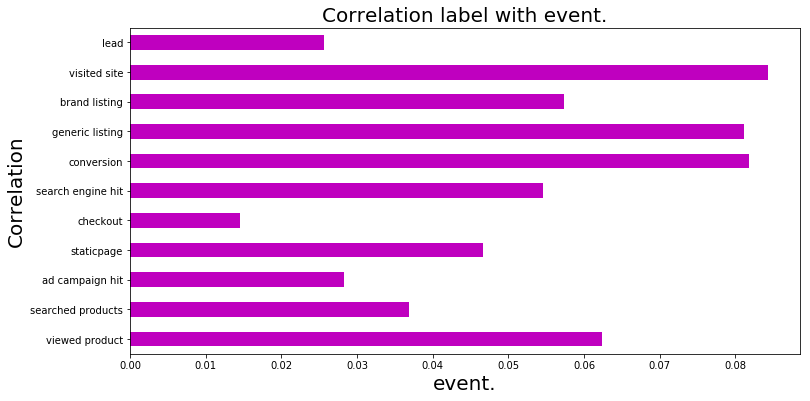

In [20]:
plt.figure(figsize=(12,6))
corr_label[0:11].plot(kind='barh', color = 'm')
plt.title('Correlation label with event.',fontsize=20)
plt.xlabel('event.',fontsize=20)
plt.ylabel('Correlation',fontsize=20)

Nos quedamos con los eventos cuya correlacion es mayor a 0.06

In [22]:
events = cantidad[['visited site', 'generic listing', 'conversion', 'viewed product']]

In [23]:
events.shape

(19414, 4)

In [24]:
cantidad.describe(percentiles=[0.1, 0.2, 0.3, 0.4, 0.5,0.6,0.7,0.8,0.9])

,viewed product,searched products,ad campaign hit,staticpage,checkout,search engine hit,conversion,generic listing,brand listing,visited site,lead,label
count,19414.000000,19414.000000,19414.000000,19414.000000,19414.000000,19414.000000,19414.000000,19414.000000,19414.000000,19414.000000,19414.000000,19414.000000
mean,32.411301,3.290770,4.893273,0.291542,1.676059,2.721181,0.183579,4.144071,5.459617,5.269342,0.022200,0.050479
std,82.964038,12.179278,11.201587,1.528046,2.509280,5.844117,0.736412,10.482960,23.697509,10.502230,0.296395,0.218937
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
10%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
20%,2.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
30%,4.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
40%,6.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000
50%,10.000000,0.000000,2.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000
60%,15.000000,0.000000,3.000000,0.000000,1.000000,2.000000,0.000000,2.000000,1.000000,3.000000,0.000000,0.000000


In [25]:
cantidad.describe(percentiles=[0.1, 0.2, 0.3, 0.4, 0.5,0.6,0.7,0.8,0.9, 0.95])

,viewed product,searched products,ad campaign hit,staticpage,checkout,search engine hit,conversion,generic listing,brand listing,visited site,lead,label
count,19414.000000,19414.000000,19414.000000,19414.000000,19414.000000,19414.000000,19414.000000,19414.000000,19414.000000,19414.000000,19414.000000,19414.000000
mean,32.411301,3.290770,4.893273,0.291542,1.676059,2.721181,0.183579,4.144071,5.459617,5.269342,0.022200,0.050479
std,82.964038,12.179278,11.201587,1.528046,2.509280,5.844117,0.736412,10.482960,23.697509,10.502230,0.296395,0.218937
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
10%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
20%,2.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
30%,4.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
40%,6.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000
50%,10.000000,0.000000,2.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000
60%,15.000000,0.000000,3.000000,0.000000,1.000000,2.000000,0.000000,2.000000,1.000000,3.000000,0.000000,0.000000


In [26]:
cantidad.describe(percentiles=[0.1, 0.2, 0.3, 0.4, 0.5,0.6,0.7,0.8,0.9, 0.95, 0.97])

,viewed product,searched products,ad campaign hit,staticpage,checkout,search engine hit,conversion,generic listing,brand listing,visited site,lead,label
count,19414.000000,19414.000000,19414.000000,19414.000000,19414.000000,19414.000000,19414.000000,19414.000000,19414.000000,19414.000000,19414.000000,19414.000000
mean,32.411301,3.290770,4.893273,0.291542,1.676059,2.721181,0.183579,4.144071,5.459617,5.269342,0.022200,0.050479
std,82.964038,12.179278,11.201587,1.528046,2.509280,5.844117,0.736412,10.482960,23.697509,10.502230,0.296395,0.218937
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
10%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
20%,2.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
30%,4.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
40%,6.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000
50%,10.000000,0.000000,2.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000
60%,15.000000,0.000000,3.000000,0.000000,1.000000,2.000000,0.000000,2.000000,1.000000,3.000000,0.000000,0.000000


In [27]:
cantidad.describe(percentiles=[0.1, 0.2, 0.3, 0.4, 0.5,0.6,0.7,0.8,0.9, 0.99])

,viewed product,searched products,ad campaign hit,staticpage,checkout,search engine hit,conversion,generic listing,brand listing,visited site,lead,label
count,19414.000000,19414.000000,19414.000000,19414.000000,19414.000000,19414.000000,19414.000000,19414.000000,19414.000000,19414.000000,19414.000000,19414.000000
mean,32.411301,3.290770,4.893273,0.291542,1.676059,2.721181,0.183579,4.144071,5.459617,5.269342,0.022200,0.050479
std,82.964038,12.179278,11.201587,1.528046,2.509280,5.844117,0.736412,10.482960,23.697509,10.502230,0.296395,0.218937
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
10%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
20%,2.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
30%,4.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
40%,6.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000
50%,10.000000,0.000000,2.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000
60%,15.000000,0.000000,3.000000,0.000000,1.000000,2.000000,0.000000,2.000000,1.000000,3.000000,0.000000,0.000000


In [30]:
cantidad[cantidad['viewed product'] < 300].describe(percentiles=[0.1, 0.2, 0.3, 0.4, 0.5,0.6,0.7,0.8,0.9, 0.95])

,viewed product,searched products,ad campaign hit,staticpage,checkout,search engine hit,conversion,generic listing,brand listing,visited site,lead,label
count,19154.000000,19154.000000,19154.000000,19154.000000,19154.000000,19154.000000,19154.000000,19154.000000,19154.000000,19154.000000,19154.000000,19154.000000
mean,25.193693,3.119244,4.542602,0.258014,1.605148,2.555341,0.175316,3.632244,4.726480,4.634123,0.016132,0.049494
std,41.343309,10.266266,8.767711,1.324200,2.290530,4.974953,0.713750,7.861378,13.140176,7.673512,0.199725,0.216902
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
10%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
20%,2.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
30%,4.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
40%,6.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
50%,9.000000,0.000000,2.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000
60%,14.000000,0.000000,3.000000,0.000000,1.000000,2.000000,0.000000,2.000000,1.000000,3.000000,0.000000,0.000000


In [32]:
data.columns

Index(['timestamp', 'event', 'person', 'url', 'sku', 'model', 'condition',
       'storage', 'color', 'skus', 'search_term', 'staticpage',
       'campaign_source', 'search_engine', 'channel', 'new_vs_returning',
       'city', 'region', 'country', 'device_type', 'screen_resolution',
       'operating_system_version', 'browser_version'],
      dtype='object')

# Timestamp

In [44]:
from sklearn import preprocessing

In [3]:
import numpy as np

In [4]:
time = pd.DataFrame()

In [5]:
time['timestamp'] = pd.to_datetime(data['timestamp'])


In [6]:
time['month'] = time['timestamp'].dt.month
time['year'] = time['timestamp'].dt.year
time['day'] = time['timestamp'].dt.day

In [7]:
time['person'] = data['person']

In [8]:
time['hour'] = time['timestamp'].dt.hour

In [40]:
time['date'] = time['timestamp'].dt.date

In [42]:
time['weekday'] = time['timestamp'].dt.weekday

In [9]:
time['min'] = time['timestamp'].dt.minute

In [10]:
time['sec'] = time['timestamp'].dt.second

In [94]:
time['hour'] = time['timestamp'].dt.hour

In [47]:
weekday_le = preprocessing.LabelEncoder()
weekday_le.fit(time.weekday)

time.weekday = weekday_le.transform(time.weekday)

In [49]:
def month_to_cyclic(df):
    df['month_sin'] = df['month'].apply(lambda x: np.sin(2*np.pi*x/12))
    df['month_cos'] = df['month'].apply(lambda x: np.cos(2*np.pi*x/12))
    df.drop('month', axis=1, inplace=True)
    
def day_to_cyclic(df):
    df['day_sin'] = df['day'].apply(lambda x: np.sin(2*np.pi*x/31))
    df['day_cos'] = df['day'].apply(lambda x: np.cos(2*np.pi*x/31))
    df.drop('day', axis=1, inplace=True)

def weekday_to_cyclic(df):
    df['weekday_sin'] = df['weekday'].apply(lambda x: np.sin(2*np.pi*x/7))
    df['weekday_cos'] = df['weekday'].apply(lambda x: np.cos(2*np.pi*x/7))
    df.drop('weekday', axis=1, inplace=True)

def hour_to_cyclic(df):
    df['hour_sin'] = df['hour'].apply(lambda x: np.sin(2*np.pi*x/24))
    df['hour_cos'] = df['hour'].apply(lambda x: np.cos(2*np.pi*x/24))
    df.drop('hour', axis=1, inplace=True)

In [51]:
time.rename(columns={'dia':'day', 'mes':'month', 'hora':'hour'}, inplace=True)

In [55]:
month_to_cyclic(time)
day_to_cyclic(time)
weekday_to_cyclic(time)
hour_to_cyclic(time)

In [23]:
time['total_time_in_second'] =  time['hour']*3600 + time['min']*60 + time['sec']

In [24]:
time.head()

,timestamp,month,year,day,person,hour,min,sec,total_time_in_second
0,2018-05-18 00:11:59,5,2018,18,4886f805,0,11,59,719
1,2018-05-18 00:11:27,5,2018,18,ad93850f,0,11,27,687
2,2018-05-18 00:11:16,5,2018,18,0297fc1e,0,11,16,676
3,2018-05-18 00:11:14,5,2018,18,2d681dd8,0,11,14,674
4,2018-05-18 00:11:09,5,2018,18,cccea85e,0,11,9,669


In [26]:
def total_second_by_day(df):
    new_df = pd.DataFrame()
    new_df['person'] = df.person.unique()
    max_total = df.total_time_in_second.agg('max')
    min_total = df.total_time_in_second.agg('min')
    if max_total == min_total:
        new_df['total'] = max_total
    else:
        new_df['total'] = max_total - min_total
    return new_df

In [27]:
def tiempo_promedio(df):
    new_df = pd.DataFrame()
    new_df['person'] = df.person.unique()
    aux = df.groupby(['person','month','year','day']).apply(lambda x: total_second_by_day(x))
    new_df['average_time_by_day'] = aux.total.mean()
    return new_df

In [ ]:
filename = 'time_with_total_time.pkl'
with open(filename, 'wb') as file:
    pkl.dump(time,file)

In [29]:
la = time.head(500)

In [32]:
la.groupby(['person','month','year','day']).apply(lambda x: total_second_by_day(x)  )

,,,,,person,total
person,month,year,day,,,
00091926,5,2018,18,0,00091926,914
0204dcec,5,2018,18,0,0204dcec,4776
0297fc1e,5,2018,18,0,0297fc1e,676
02a9fd4c,5,2018,18,0,02a9fd4c,22
0e9d0ae2,5,2018,18,0,0e9d0ae2,491
0ec008ff,5,2018,18,0,0ec008ff,298
15ea8012,5,2018,18,0,15ea8012,707
16d0e27d,5,2018,18,0,16d0e27d,259
16fad36a,5,2018,18,0,16fad36a,48


In [38]:
time2 = time.groupby(['person','month','year','day']).apply(lambda x:  x.total_time_in_second.agg('max') if  x.total_time_in_second.agg('max') ==  x.total_time_in_second.agg('min') else x.total_time_in_second.agg('max') - x.total_time_in_second.agg('min') ).reset_index()

In [47]:
time3 = time2.groupby('person').apply(lambda x: x[0].mean())

In [53]:
time3 = time3.reset_index(name='tiempo_promedio_por_dia')

In [54]:
time3

,person,tiempo_promedio_por_dia
0,0008ed71,14450.000000
1,00091926,17451.590909
2,00091a7a,347.000000
3,000ba417,11277.000000
4,000c79fe,620.000000
5,000e4d9e,6850.666667
6,000e619d,4015.000000
7,001001be,34837.000000
8,0010e89a,43.000000
9,0016c4b5,2.000000


In [56]:
sum(time3['person'].value_counts()>1)

0

In [57]:
time3.shape

(38829, 2)

In [61]:
tiempo_promedio = pd.merge(time3, label, on='person', how='right')

In [62]:
tiempo_promedio.head()

,person,tiempo_promedio_por_dia,label
0,0008ed71,14450.000000,0
1,000c79fe,620.000000,0
2,001802e4,646.000000,0
3,0019e639,12988.714286,0
4,001b0bf9,918.000000,0


In [64]:
tiempo_promedio.shape

(19414, 3)

In [66]:
filename = 'tiempo_promedio_por_dia.pkl'
with open(filename, 'wb') as file:
    pkl.dump(tiempo_promedio,file)

# Model

In [102]:
model= data[['person','model']]

In [103]:
model.model = model.model.astype('category')

/home/july/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:3110: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [104]:
model.model = model.model.apply(lambda x: str(x).split(' ')[0])

/home/july/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:3110: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [105]:
model.model.unique()

array(['Samsung', 'iPhone', 'LG', 'Motorola', 'iPad', 'Sony', 'Lenovo',
       'Quantum', 'Asus', 'Xiaomi', 'Outros'], dtype=object)

In [106]:
model.model = model.model.astype('category')


/home/july/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:3110: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [107]:
model.model = model.model.cat.codes

/home/july/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:3110: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [108]:
model.model.unique()

array([ 6, 10,  1,  3,  9,  7,  2,  5,  0,  8,  4], dtype=int64)

In [17]:
model.head()

,person,model
0,4886f805,6
1,ad93850f,10
2,0297fc1e,10
3,2d681dd8,10
4,cccea85e,1


In [134]:
df2 = pd.DataFrame()

In [135]:
df2['a'] = ['a','a','a','a','c','c','c','c']
df2['model']=['c','e','d','d','a','a','a','a']

In [121]:
df.c.mode()[0]

'd'

In [124]:
return_mode(df)

0    d
dtype: object

In [112]:
def return_mode(df):
    mode = df.model.mode()
    return mode if len(mode) == 1 else mode[0]

In [136]:
df2.groupby('a').apply(lambda x: return_mode(x))

,0
a,
a,d
c,a


In [138]:
modelo_mas_visto = model.groupby('person').apply(lambda x: x.model.mode()[0]).reset_index(name='modelo_mas_visto')

In [139]:
sum(modelo_mas_visto.person.value_counts()>1)

0

In [30]:
del modelo_mas_visto['level_1']

In [140]:
filename = 'modelo_mas_visto.pkl'
with open(filename, 'wb') as file:
    pkl.dump(modelo_mas_visto,file)

In [31]:
cantidad_modelos_distintos_vistos = model.groupby('person').apply(lambda x: len(x.model.unique())).reset_index(name='modelo_mas_visto')

In [33]:
cantidad_modelos_distintos_vistos.head()

,person,modelo_mas_visto
0,0008ed71,4
1,00091926,8
2,00091a7a,2
3,000ba417,6
4,000c79fe,2


In [35]:
cantidad_modelos_distintos_vistos.rename(columns={'modelo_mas_visto':'cant_model_vistos'}, inplace=True)

In [36]:
data.columns

Index(['timestamp', 'event', 'person', 'url', 'sku', 'model', 'condition',
       'storage', 'color', 'skus', 'search_term', 'staticpage',
       'campaign_source', 'search_engine', 'channel', 'new_vs_returning',
       'city', 'region', 'country', 'device_type', 'screen_resolution',
       'operating_system_version', 'browser_version'],
      dtype='object')

In [56]:
import pickle as pkl

In [57]:
filename = 'cantida_modelos_distintos.pkl'
with open(filename, 'wb') as file:
    pkl.dump(cantidad_modelos_distintos_vistos,file)

# Condition

In [25]:
condition = data[['person','condition']]

In [26]:
condition.condition.unique()

array(['Excelente', 'Muito Bom', 'Bom', nan, 'Bom - Sem Touch ID', 'Novo'],
      dtype=object)

In [27]:
conditions = {'condition':{'Excelente' : 5, 'Muito Bom': 4 , 'Bom' : 3, 'Bom - Sem Touch ID' : 2, 'Novo' : 1}}

In [28]:
condition.replace(conditions,inplace=True)

/home/july/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:3855: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  regex=regex)


In [29]:
condition.head()

,person,condition
0,4886f805,5.0
1,ad93850f,4.0
2,0297fc1e,4.0
3,2d681dd8,3.0
4,cccea85e,5.0


In [45]:
condition.condition.mode()[0]

3.0

In [58]:
def condition_mode(df):
    mode = df.condition.mode()
    return mode[0] if len(mode) != 0 else 3

In [59]:
condition_mode = condition.groupby('person').apply(lambda x: condition_mode(x)).reset_index(name='condition_mode')

In [60]:
sum(condition_mode.person.value_counts()>1)

0

In [62]:
condition_mode.head()

,person,condition_mode
0,0008ed71,3.0
1,00091926,4.0
2,00091a7a,5.0
3,000ba417,3.0
4,000c79fe,3.0


In [63]:
filename = 'condition_mode.pkl'
with open(filename, 'wb') as file:
    pkl.dump(condition_mode,file)

In [ ]:
'tiempo_promedio_por_dia.pkl'
'cantida_modelos_distintos.pkl'
'modelo_mas_visto.pkl'
'condition_mode.pkl'

# Storage

In [64]:
storage = data[['person','storage']]

In [65]:
storage.storage.unique()

array(['32GB', '64GB', '128GB', nan, '16GB', '8GB', '256GB', '4GB',
       '512MB'], dtype=object)

In [66]:
storages={'storage':{'32GB' : 32 , '64GB' : 64 , '128GB' : 128 , '16GB' : 16 , '8GB' : 8 , '256GB' : 256,  '4GB' : 4 ,
       '512MB': 0.512}}

In [67]:
storage.replace(storages, inplace=True)

/home/july/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:3855: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  regex=regex)


In [68]:
storage.head()

,person,storage
0,4886f805,32.0
1,ad93850f,32.0
2,0297fc1e,64.0
3,2d681dd8,128.0
4,cccea85e,32.0


In [70]:
storage.storage.mode()

0    16.0
dtype: float64

In [72]:
def return_mode_storage(df):
    mode = df.storage.mode()
    return mode[0] if len(mode) != 0 else 16

In [73]:
storage_mode = storage.groupby('person').apply(lambda x: return_mode_storage(x)).reset_index(name='storage_mode')

In [75]:
storage_mode.head()

,person,storage_mode
0,0008ed71,32.0
1,00091926,32.0
2,00091a7a,16.0
3,000ba417,16.0
4,000c79fe,128.0


In [77]:
sum(storage_mode.person.value_counts()>1)

0

In [60]:
del storage_mas_visto['level_1']

In [79]:
filename = 'storage_mode.pkl'
with open(filename, 'wb') as file:
    pkl.dump(storage_mode,file)

In [ ]:
'tiempo_promedio_por_dia.pkl'
'cantida_modelos_distintos.pkl'
'modelo_mas_visto.pkl'
'condition_mode.pkl'
'storage_mode.pkl'

In [62]:
data.columns

Index(['timestamp', 'event', 'person', 'url', 'sku', 'model', 'condition',
       'storage', 'color', 'skus', 'search_term', 'staticpage',
       'campaign_source', 'search_engine', 'channel', 'new_vs_returning',
       'city', 'region', 'country', 'device_type', 'screen_resolution',
       'operating_system_version', 'browser_version'],
      dtype='object')

In [65]:
data.search_term.unique()

array([nan, 'iPhone se', '6splus', ..., 'moro g5 plus', 'S8 edege',
       'motp zc'], dtype=object)

In [66]:
data.staticpage.unique()

array([nan, 'Conditions', 'AboutUs', 'how-to-sell', 'trust-trocafone',
       'how-to-buy', 'CustomerService', 'club-trocafone', 'Quiosks',
       'FaqEcommerce', 'TermsAndConditionsReturnEcommerce',
       'TermsAndConditionsEcommerce', 'galaxy-s8', 'PrivacyEcommerce',
       'black_friday'], dtype=object)

In [67]:
data.campaign_source.unique()

array([nan, 'google', 'afilio', 'manifest', 'rtbhouse', 'criteo',
       'rakuten', 'voxus', 'zanox', 'emblue', 'datacrush', 'buscape',
       'FacebookAds', 'blog', 'bing', 'indexa', 'Facebook', 'yotpo',
       'afiliado', 'mercadopago', 'FacebookSocial', 'MARKETING SOCIAL',
       'onsite', 'gizmodo'], dtype=object)

# Campaign Source

In [80]:
campaing = data[['person','campaign_source']]

In [81]:
campaing.campaign_source = campaing.campaign_source.astype('category')

/home/july/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:3110: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [82]:
campaing.campaign_source = campaing.campaign_source.cat.codes

/home/july/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:3110: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [83]:
campaing.head()

,person,campaign_source
0,4886f805,-1
1,ad93850f,-1
2,0297fc1e,-1
3,2d681dd8,-1
4,cccea85e,-1


In [84]:
campaing.campaign_source.mode()

0   -1
dtype: int8

In [85]:
def return_mode_campaing(df):
    mode = df.campaign_source.mode()
    return mode[0] if len(mode) != 0 else -1

In [87]:
campaing_mode = campaing.groupby('person').apply(lambda x: return_mode_campaing(x)).reset_index(name='campaing_mode')

In [88]:
campaing_mode.head()

,person,campaing_mode
0,0008ed71,-1
1,00091926,-1
2,00091a7a,-1
3,000ba417,-1
4,000c79fe,-1


In [89]:
sum(campaing_mode.person.value_counts()>1)

0

In [90]:
filename = 'campaing_mode.pkl'
with open(filename, 'wb') as file:
    pkl.dump(campaing_mode,file)

In [ ]:
'tiempo_promedio_por_dia.pkl'
'cantida_modelos_distintos.pkl'
'modelo_mas_visto.pkl'
'condition_mode.pkl'
'storage_mode.pkl'
'campaing_mode.pkl'

In [78]:
data.columns

Index(['timestamp', 'event', 'person', 'url', 'sku', 'model', 'condition',
       'storage', 'color', 'skus', 'search_term', 'staticpage',
       'campaign_source', 'search_engine', 'channel', 'new_vs_returning',
       'city', 'region', 'country', 'device_type', 'screen_resolution',
       'operating_system_version', 'browser_version'],
      dtype='object')

In [79]:
data.search_engine.unique()

array([nan, 'Google', 'Yahoo', 'Bing', 'Ask'], dtype=object)

In [2]:
import pickle as pkl

In [3]:
filename = 'cantidad_eventos_por_persona.pkl'
with open(filename, 'rb') as file:
    cant_event = pkl.load(file)

In [ ]:
'tiempo_promedio_por_dia.pkl'
'cantida_modelos_distintos.pkl'
'modelo_mas_visto.pkl'
'condition_mode.pkl'
'storage_mode.pkl'
'campaing_mode.pkl'
'cantidad_eventos_por_persona.pkl'

In [4]:
cant_event.shape

(19414, 13)

In [5]:
events = cant_event[['visited site', 'generic listing', 'conversion', 'viewed product', 'person']]

In [6]:
events.head()

,visited site,generic listing,conversion,viewed product,person
0,2,1,0,0,0008ed71
1,1,1,0,3,000c79fe
2,1,4,0,4,001802e4
3,19,28,2,189,0019e639
4,0,1,1,2,001b0bf9


In [7]:
filename ='tiempo_promedio_por_dia.pkl'
with open(filename, 'rb') as file:
    time_average = pkl.load(file)

In [8]:
time_average.head()

,person,tiempo_promedio_por_dia,label
0,0008ed71,14450.000000,0
1,000c79fe,620.000000,0
2,001802e4,646.000000,0
3,0019e639,12988.714286,0
4,001b0bf9,918.000000,0


In [10]:
import pandas as pd

In [11]:
df = pd.merge(events, time_average, on= 'person', how='inner')

In [12]:
df.head()

,visited site,generic listing,conversion,viewed product,person,tiempo_promedio_por_dia,label
0,2,1,0,0,0008ed71,14450.000000,0
1,1,1,0,3,000c79fe,620.000000,0
2,1,4,0,4,001802e4,646.000000,0
3,19,28,2,189,0019e639,12988.714286,0
4,0,1,1,2,001b0bf9,918.000000,0


In [13]:
events.shape, time_average.shape, df.shape

((19414, 5), (19414, 3), (19414, 7))

In [14]:
filename = 'modelo_mas_visto.pkl'
with open(filename, 'rb') as file:
    model_mode = pkl.load(file)

In [15]:
model_mode.shape

(38829, 2)

In [16]:
sum(model_mode.person.value_counts()>1)

0

In [18]:
df2 = pd.merge(df, model_mode, on='person',how='left')

In [20]:
df2.shape

(19414, 8)

In [91]:
filename = 'condition_mode.pkl'
with open(filename, 'rb') as file:
    condition_mode = pkl.load(file)

In [92]:
condition_mode.shape

(38829, 2)

In [93]:
sum(condition_mode.person.value_counts()>1)

0

In [94]:
df3 = pd.merge(df2, condition_mode, on='person', how='left')

In [95]:
df3.shape

(19414, 9)

In [96]:
filename = 'storage_mode.pkl'
with open(filename, 'rb') as file:
    storage_mode = pkl.load(file)

In [97]:
sum(storage_mode.person.value_counts()>1)

0

In [98]:
del df2

In [99]:
df4 = pd.merge(df3, storage_mode, on='person', how = 'left')

In [100]:
df4.shape

(19414, 10)

In [101]:
filename = 'campaing_mode.pkl'
with open(filename, 'rb') as file:
    campaing_mode = pkl.load(file)

In [102]:
sum(campaing_mode.person.value_counts()>1)

0

In [103]:
df5 = pd.merge(df4, campaing_mode, on='person', how='left')

In [104]:
df5.shape

(19414, 11)

In [111]:
df5.columns

Index(['visited site', 'generic listing', 'conversion', 'viewed product',
       'person', 'tiempo_promedio_por_dia', 'label', 'modelo_mas_visto',
       'condition_mode', 'storage_mode', 'campaing_mode'],
      dtype='object')

In [112]:
filename = 'cantida_modelos_distintos.pkl'
with open(filename, 'rb') as file:
    cantidad_modelos_distintos = pkl.load(file)

In [114]:
sum(cantidad_modelos_distintos.person.value_counts()>1)

0

In [115]:
df6 = pd.merge(df5, cantidad_modelos_distintos, on='person', how='left')

In [116]:
df6.shape

(19414, 12)

In [117]:
filename = 'features_juli.pkl'
with open(filename, 'wb') as file:
     pkl.dump(df6,file)

In [118]:
df6.to_csv('features_juli.csv')